In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.32


In [3]:
def build(robot,x=5,y=10,angle=0):
    R=.5
    r=R/5
    disk_center=Disk(robot,x=x,y=y,radius=R,angle=angle,name='center')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    robot.disks=disks
    robot.angles=list(range(0,360,30))
    robot.distances=[-1]*len(disks)

    robot.S=Storage()

In [10]:
def forward_horizontal_complex(distance):
    
    def _forward_horizontal(t,robot):
    
        if t==0:
            robot['center'].start_location=robot['center'].x

        robot['center'].F=10
        robot['center'].τ=0
        robot.message="forward"

        if robot['center'].x - robot['center'].start_location > distance:
            return True

    return _forward_horizontal

def forward_horizontal_simple(t,robot):
    distance=5
    
    if t==0:
        robot['center'].start_location=robot['center'].x

    robot['center'].F=10
    robot['center'].τ=0
    robot.message="forward"

    if robot['center'].x - robot['center'].start_location > distance:
        return True



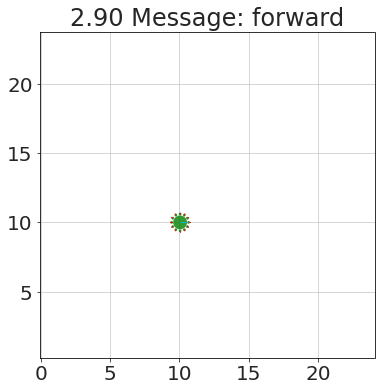

In [11]:
env=FrictionEnvironment(24,24)  # size of the environment
robot=Robot(env)
build(robot)


run_sim(env,forward_horizontal_simple,
        figure_width=6,
        total_time=120,  # seconds
        dt_display=.5,  # make this larger for a faster display
       )

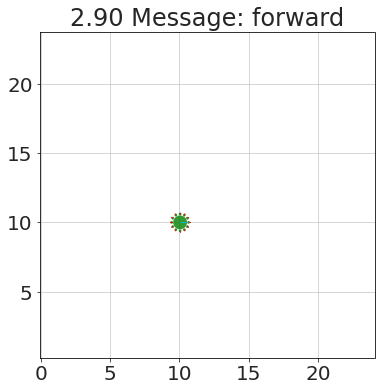

In [12]:
env=FrictionEnvironment(24,24)  # size of the environment
robot=Robot(env)
build(robot)


run_sim(env,forward_horizontal_complex(5),
        figure_width=6,
        total_time=120,  # seconds
        dt_display=.5,  # make this larger for a faster display
       )